In [1]:
#imports
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from keras.models import load_model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, LeakyReLU, Reshape
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.io import loadmat
import math
pi = math.pi

In [ ]:
#Generate random samples from a uniform distribution
xi = np.random.uniform(4e-8, 2e-7, size=(50,50))
yi = np.random.uniform(4e-8, 2e-7, size=(50,50))

upload last time's random distribution

In [61]:
from google.colab import files
uploaded = files.upload()

Saving Forward_Eval_H1um_Rand50x50_Dx_Original.csv to Forward_Eval_H1um_Rand50x50_Dx_Original.csv


In [62]:
uploaded = files.upload()

Saving Forward_Eval_H1um_Rand50x50_Dy_Original.csv to Forward_Eval_H1um_Rand50x50_Dy_Original.csv


In [63]:
import io

In [77]:
xi=pd.read_csv('Forward_Eval_H1um_Rand50x50_Dx_Original.csv',sep=",", header=None)
yi=pd.read_csv('Forward_Eval_H1um_Rand50x50_Dy_Original.csv',sep=",", header=None)

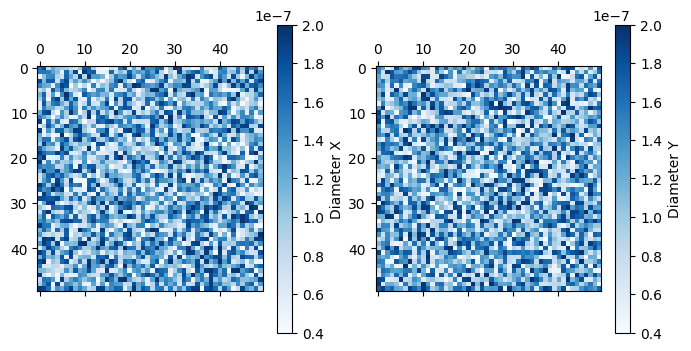

In [78]:
plt.rcParams['figure.figsize']=(8,4)
plt.rcParams['figure.dpi']=100

ax = plt.subplot(1,2,1)
cm = xi

cax = ax.matshow(cm, cmap=plt.cm.Blues,vmin=4e-8, vmax=2e-7) #force the dark color here

plt.colorbar(cax,label="Diameter X")

ax = plt.subplot(1,2,2)
cm = yi

cax = ax.matshow(cm, cmap=plt.cm.Blues,vmin=4e-8, vmax=2e-7)
plt.colorbar(cax,label="Diameter Y")

In [ ]:
pd.DataFrame(xi)

##Download to give to Lum

In [79]:
np.savetxt('Forward_Eval_H1um_Rand50x50_Dx.csv',xi, fmt='%1.64e', delimiter=', ')
np.savetxt('Forward_Eval_H1um_Rand50x50_Dy.csv',yi, fmt='%1.64e', delimiter=', ')
from google.colab import files
files.download("Forward_Eval_H1um_Rand50x50_Dx.csv")
files.download("Forward_Eval_H1um_Rand50x50_Dy.csv")

#files.download("Prediction Ry_10nm_LS"+LS_value+"_50x50.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Load back lum files

In [90]:
#upload ideal spectrum plots
from google.colab import files
uploaded = files.upload()

Saving Lum_meshgrid_rand50x50_H1um.mat to Lum_meshgrid_rand50x50_H1um (1).mat


In [91]:
import scipy.io
from scipy.io import loadmat
mat_5 = loadmat('Lum_meshgrid_rand50x50_H1um.mat')

In [92]:
#items: to return a group of the key-value pairs in the dictionary
mat_dict5 = mat_5.items()

In [93]:
#convert object to a list
mat_list5 = list(mat_dict5)

In [ ]:
pd.DataFrame(mat_list5)

,0,1
0,__header__,"b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Crea..."
1,__version__,1.0
2,__globals__,[]
3,out_Px,"[[-0.21298429851500442, -0.12407307550322198, ..."
4,out_Py,"[[2.9286083550747715, 2.9932559614724235, 3.02..."
5,out_Tx,"[[[0.9859499769792684, 0.9859413138056311, 0.9..."
6,out_Ty,"[[[0.9859499769792683, 0.9859413138056319, 0.9..."


In [94]:
Lum_Tx = np.reshape(np.asarray(mat_list5[5][1]),(50,50,13), order='C')
Lum_Ty = np.reshape(np.asarray(mat_list5[6][1]),(50,50,13), order='C')
Lum_Px = np.reshape(np.asarray(mat_list5[3][1]),(50,50), order='C')
Lum_Py = np.reshape(np.asarray(mat_list5[4][1]),(50,50), order='C')

In [ ]:
pd.DataFrame(Lum_Px)

In [95]:
#normalize the phase - ONLY DO ONCE
Lum_Px = (Lum_Px+pi)/2/pi
Lum_Py = (Lum_Py+pi)/2/pi

##Feed into forward model

In [57]:
xi.shape

(50, 50)

In [85]:
flat_xi = np.reshape(np.asarray(xi),(2500,1), order='C')/2e-7
flat_yi = np.reshape(np.asarray(yi),(2500,1), order='C')/2e-7

#normalize dim to between 0 and 1!


input_dim = np.transpose(np.squeeze(np.asarray([flat_xi, flat_yi])))

##ND, W2015

In [15]:
#upload forward - PHASE
from google.colab import files
upload = files.upload()

Saving Forward Phase - ND - W2015 - LS4.12671.h5 to Forward Phase - ND - W2015 - LS4.12671.h5


In [87]:
#Load back .h5 format
forward_loaded_Phase = tf.keras.models.load_model("Forward Phase - ND - W2015 - LS4.12671.h5")
pred_responce_Phase = np.squeeze(forward_loaded_Phase.predict(input_dim))

Pred_Px = np.reshape(np.asarray(pred_responce_Phase[0])/20,(50,50), order='C')
Pred_Py = np.reshape(np.asarray(pred_responce_Phase[1])/15,(50,50), order='C')

79/79 [==============================] - 1s 11ms/step


In [18]:
#upload forward - Transmission
from google.colab import files
upload = files.upload()

Saving Forward Transmission - ND - NW - LS07069.h5 to Forward Transmission - ND - NW - LS07069.h5


In [88]:
#Load back .h5 format
forward_loaded_Trans = tf.keras.models.load_model("Forward Transmission - ND - NW - LS07069.h5")
pred_responce_Trans = np.squeeze(forward_loaded_Trans.predict(input_dim))

79/79 [==============================] - 1s 8ms/step


In [89]:
Pred_Tx = np.reshape(np.transpose(np.asarray(pred_responce_Trans[0:13])),(50,50,13), order='C')
Pred_Ty = np.reshape(np.transpose(np.asarray(pred_responce_Trans[13:27])),(50,50,13), order='C') #remember to transpose!

In [21]:
Pred_Tx.shape

(50, 50, 13)

In [22]:
Lum_Tx.shape

(50, 50, 13)


###Eval Duo Models ND, W2015

In [96]:
#MAE
Mean_Abs_Error_Tx = sum(sum(sum(abs(Lum_Tx-Pred_Tx))))/32500
print('Tx: ',Mean_Abs_Error_Tx)
Mean_Abs_Error_Ty = sum(sum(sum(abs(Lum_Ty-Pred_Ty))))/32500
print('Ty: ',Mean_Abs_Error_Ty)
Mean_Abs_Error_Px = sum(sum(abs(Lum_Px-Pred_Px)))/2500
print('Px: ',Mean_Abs_Error_Px)
Mean_Abs_Error_Py = sum(sum(abs(Lum_Py-Pred_Py)))/2500
print('Py: ',Mean_Abs_Error_Py) #NOTE: THIS ERROR HAS BEEN NORMALIZED

Tx:  0.01904554050255553
Ty:  0.019825223439732476
Px:  0.025440998321317014
Py:  0.028614094285464284


In [97]:
#MSE
Mean_Sq_Error_Tx = Mean_Abs_Error_Tx**2
print('Tx: ',Mean_Sq_Error_Tx)
Mean_Sq_Error_Ty = Mean_Abs_Error_Ty**2
print('Ty: ',Mean_Sq_Error_Ty)
Mean_Sq_Error_Px = Mean_Abs_Error_Px**2
print('Px: ',Mean_Sq_Error_Px)
Mean_Sq_Error_Py = Mean_Abs_Error_Py**2
print('Py: ',Mean_Sq_Error_Py)

Tx:  0.0003627326130344832
Ty:  0.00039303948443531795
Px:  0.0006472443955852551
Py:  0.0008187663917774398


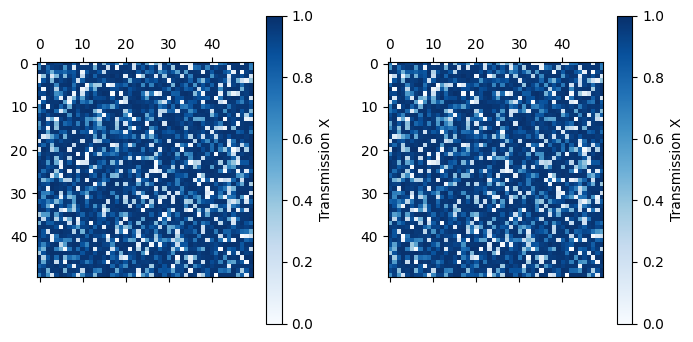

In [99]:
n=6 #n is the wavelength slice
plt.rcParams['figure.figsize']=(8,4)
plt.rcParams['figure.dpi']=100
plt.subplots_adjust(wspace=0.3, hspace=0.3) #add more space in-between plots

ax = plt.subplot(1,2,1)
cm = Lum_Tx[:,:,n] #20nm range is 0 to 12

cax = ax.matshow(cm, cmap=plt.cm.Blues,vmin=0, vmax=1) #force the dark color here

plt.colorbar(cax,label="Transmission X")

ax = plt.subplot(1,2,2)
cm = Pred_Tx[:,:,n]

cax = ax.matshow(cm, cmap=plt.cm.Blues,vmin=0, vmax=1)
plt.colorbar(cax,label="Transmission X")

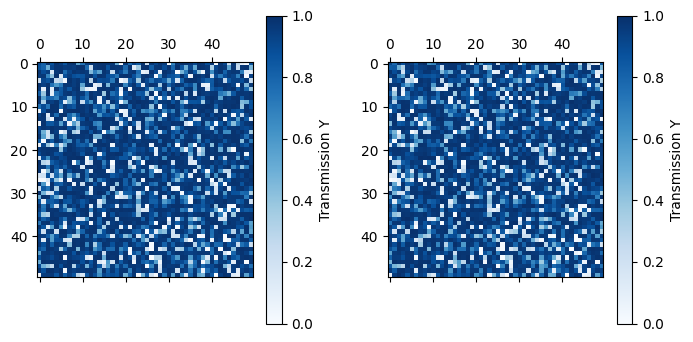

In [100]:
n=6 #n is the wavelength slice
plt.rcParams['figure.figsize']=(8,4)
plt.rcParams['figure.dpi']=100
plt.subplots_adjust(wspace=0.3, hspace=0.3) #add more space in-between plots

ax = plt.subplot(1,2,1)
cm = Lum_Ty[:,:,n] #20nm range is 0 to 12

cax = ax.matshow(cm, cmap=plt.cm.Blues,vmin=0, vmax=1) #force the dark color here

plt.colorbar(cax,label="Transmission Y")

ax = plt.subplot(1,2,2)
cm = Pred_Ty[:,:,n]

cax = ax.matshow(cm, cmap=plt.cm.Blues,vmin=0, vmax=1)
plt.colorbar(cax,label="Transmission Y")

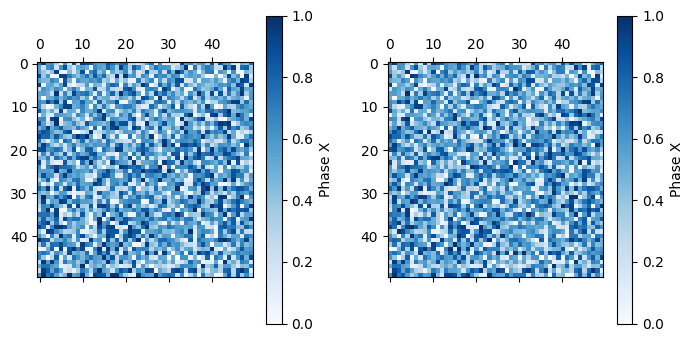

In [101]:
plt.rcParams['figure.figsize']=(8,4)
plt.rcParams['figure.dpi']=100
plt.subplots_adjust(wspace=0.3, hspace=0.3) #add more space in-between plots

ax = plt.subplot(1,2,1)
cm = Lum_Px

cax = ax.matshow(cm, cmap=plt.cm.Blues,vmin=0, vmax=1)

plt.colorbar(cax,label="Phase X")

ax = plt.subplot(1,2,2)
cm = Pred_Px

cax = ax.matshow(cm, cmap=plt.cm.Blues,vmin=0, vmax=1)
plt.colorbar(cax,label="Phase X")

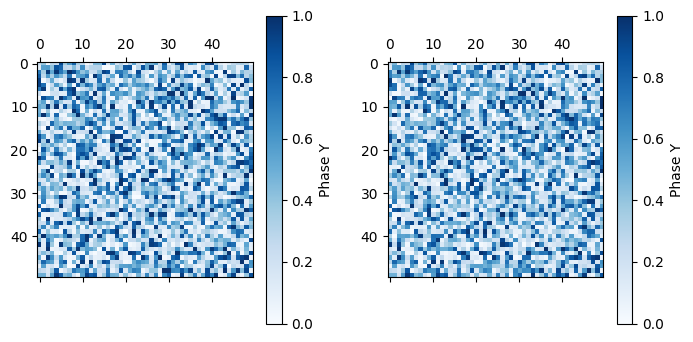

In [102]:
plt.rcParams['figure.figsize']=(8,4)
plt.rcParams['figure.dpi']=100
plt.subplots_adjust(wspace=0.3, hspace=0.3) #add more space in-between plots

ax = plt.subplot(1,2,1)
cm = Lum_Py

cax = ax.matshow(cm, cmap=plt.cm.Blues,vmin=0, vmax=1)

plt.colorbar(cax,label="Phase Y")

ax = plt.subplot(1,2,2)
cm = Pred_Py

cax = ax.matshow(cm, cmap=plt.cm.Blues,vmin=0, vmax=1)
plt.colorbar(cax,label="Phase Y")

###Spectrum Pred

In [103]:
def flatten_data (data):
    return np.reshape(data,(2500,13), order='C')

In [104]:
def plot_spectrum_pred_small (n, x_axis, y_ideal, y_pred, name): #where n is r1 r2 values in single vector
  #transmission subplots
    plt.rcParams['figure.figsize']=(5,3)
    plt.plot(x_axis, y_pred[n], c="r", label="Predictions", marker='o')
    plt.plot(x_axis, y_ideal[n], c="g", label="Validation", marker='o')
    plt.xlabel("Wavelength (nm)")
    plt.ylabel(name)
    plt.ylim([0,1.1])

<Figure size 800x400 with 0 Axes>

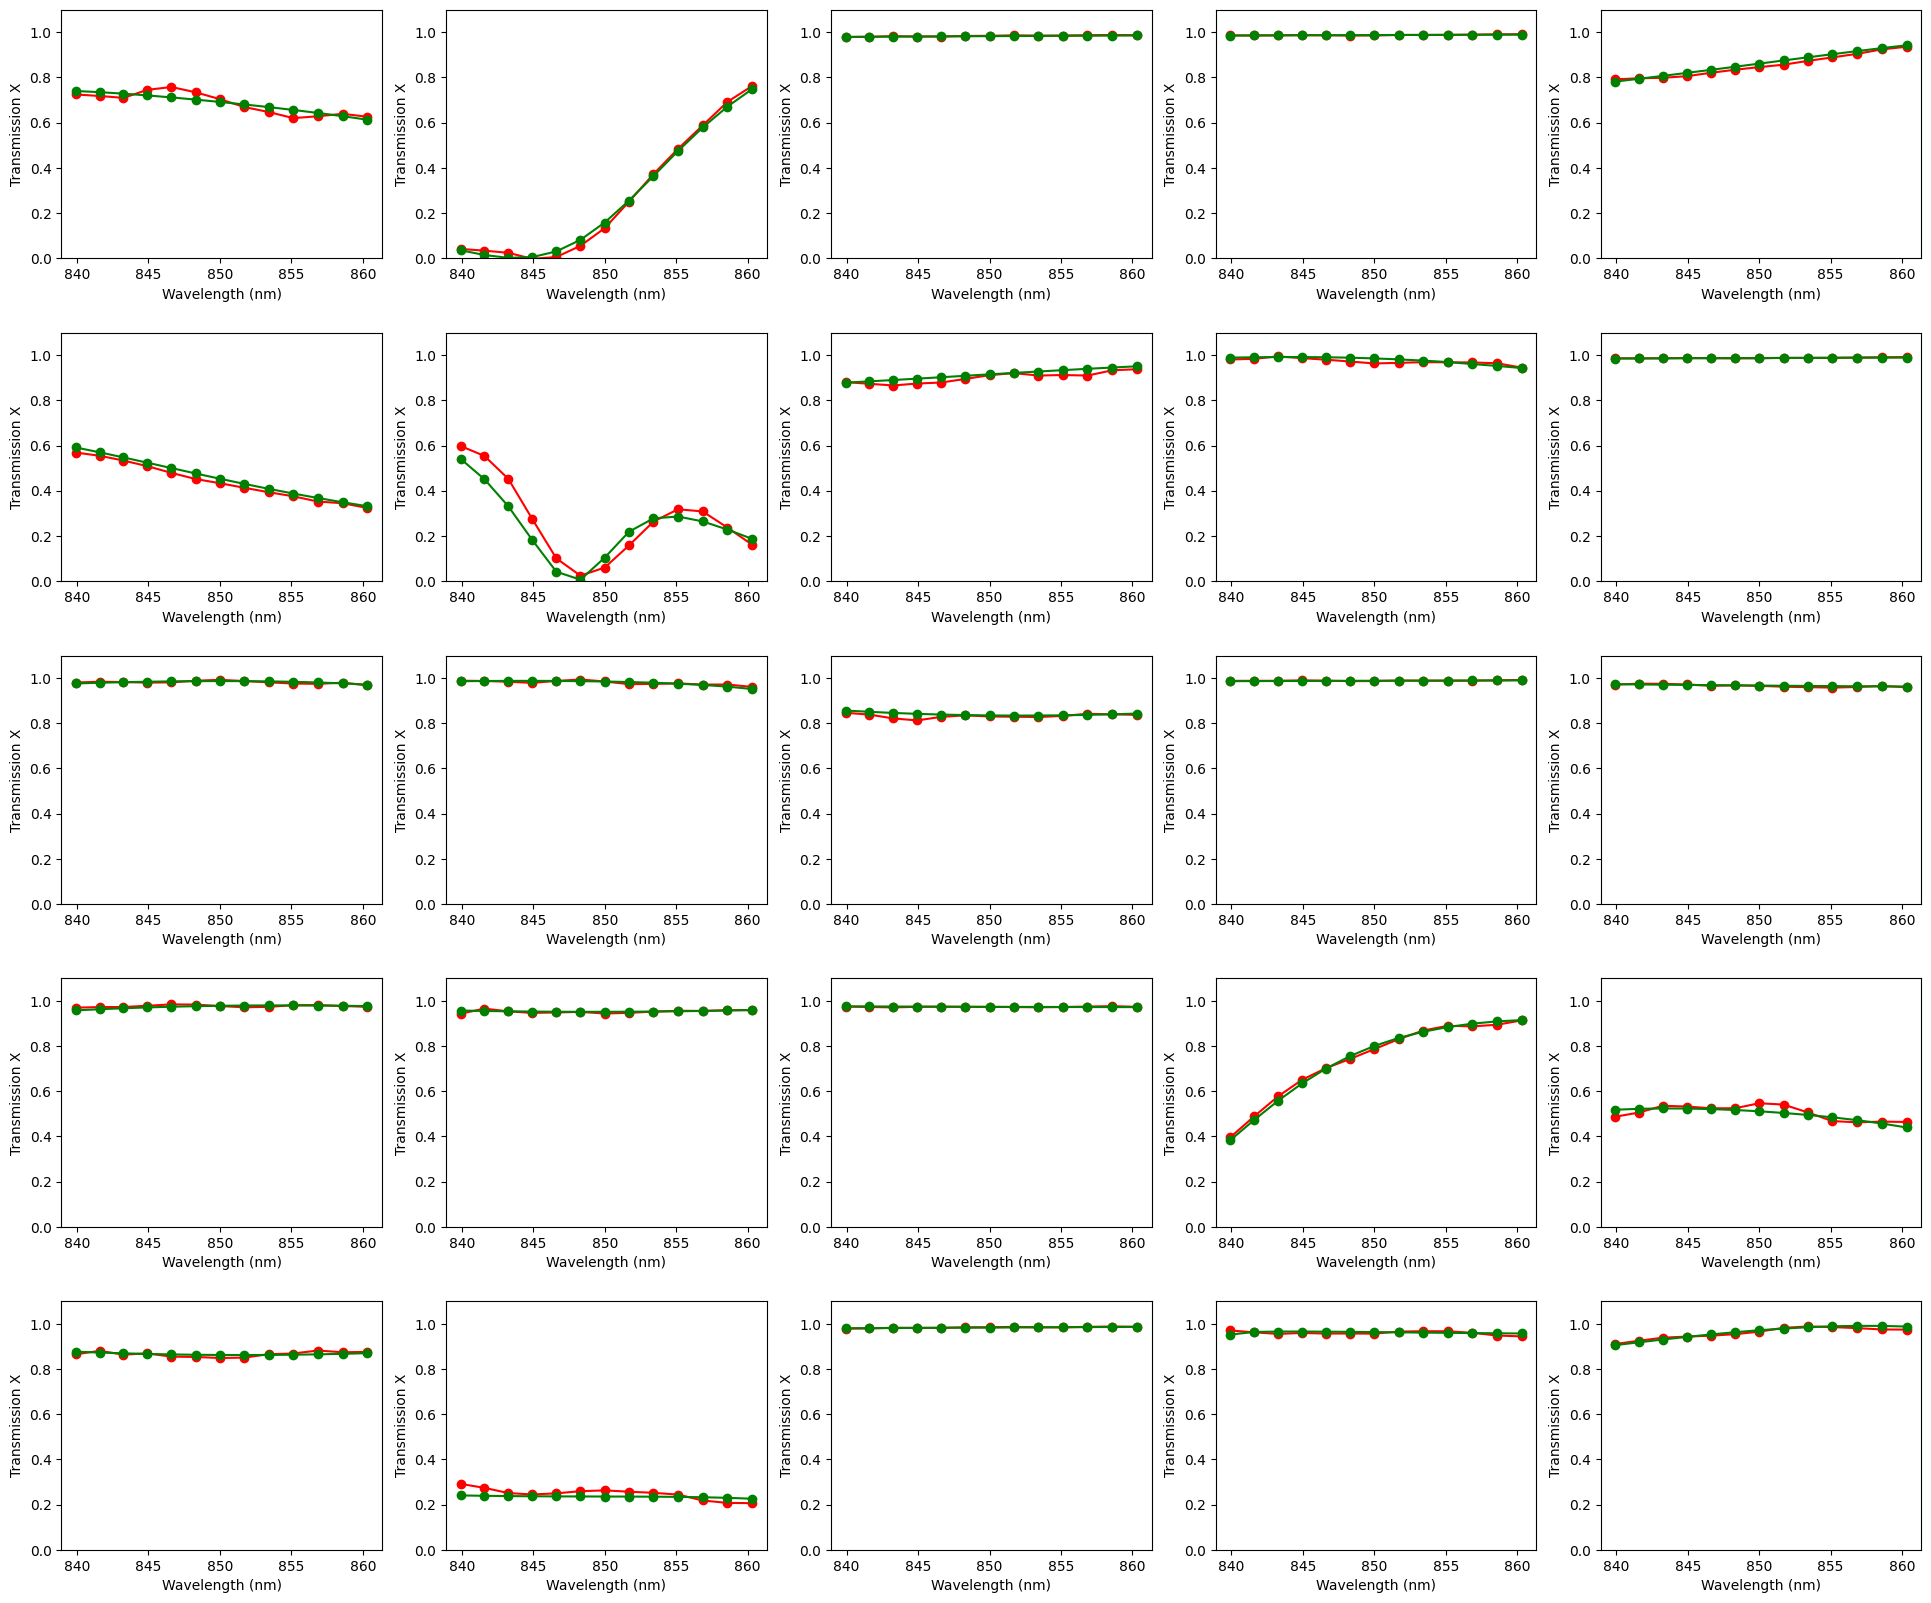

In [105]:
  lambda_c=0.85e-6 #central wavelength
  c = 299792458 #speed of light
  frequency_list =np.linspace(0.95, 1.05, num=51)*c/lambda_c #list of frequency spectrum
  wavelength_list = c/frequency_list
  wavelength_list_nm = wavelength_list*1e9
  wavelist_20nm_range = wavelength_list_nm[19:32]

  flat_pred_Tx = flatten_data(Pred_Tx)
  flat_pred_Ty = flatten_data(Pred_Ty)
  flat_ideal_Tx = flatten_data(Lum_Tx)
  flat_ideal_Ty = flatten_data(Lum_Ty)

  plt.clf() #clears plot first
  plt.figure(figsize=(24, 20))
  plt.subplots_adjust(hspace=0.3)
  for n in range(1,26):
      plt.subplot(5,5,n)
      plot_spectrum_pred_small((n*100)-1, wavelist_20nm_range, flat_ideal_Tx, flat_pred_Tx, "Transmission X")

<Figure size 500x300 with 0 Axes>

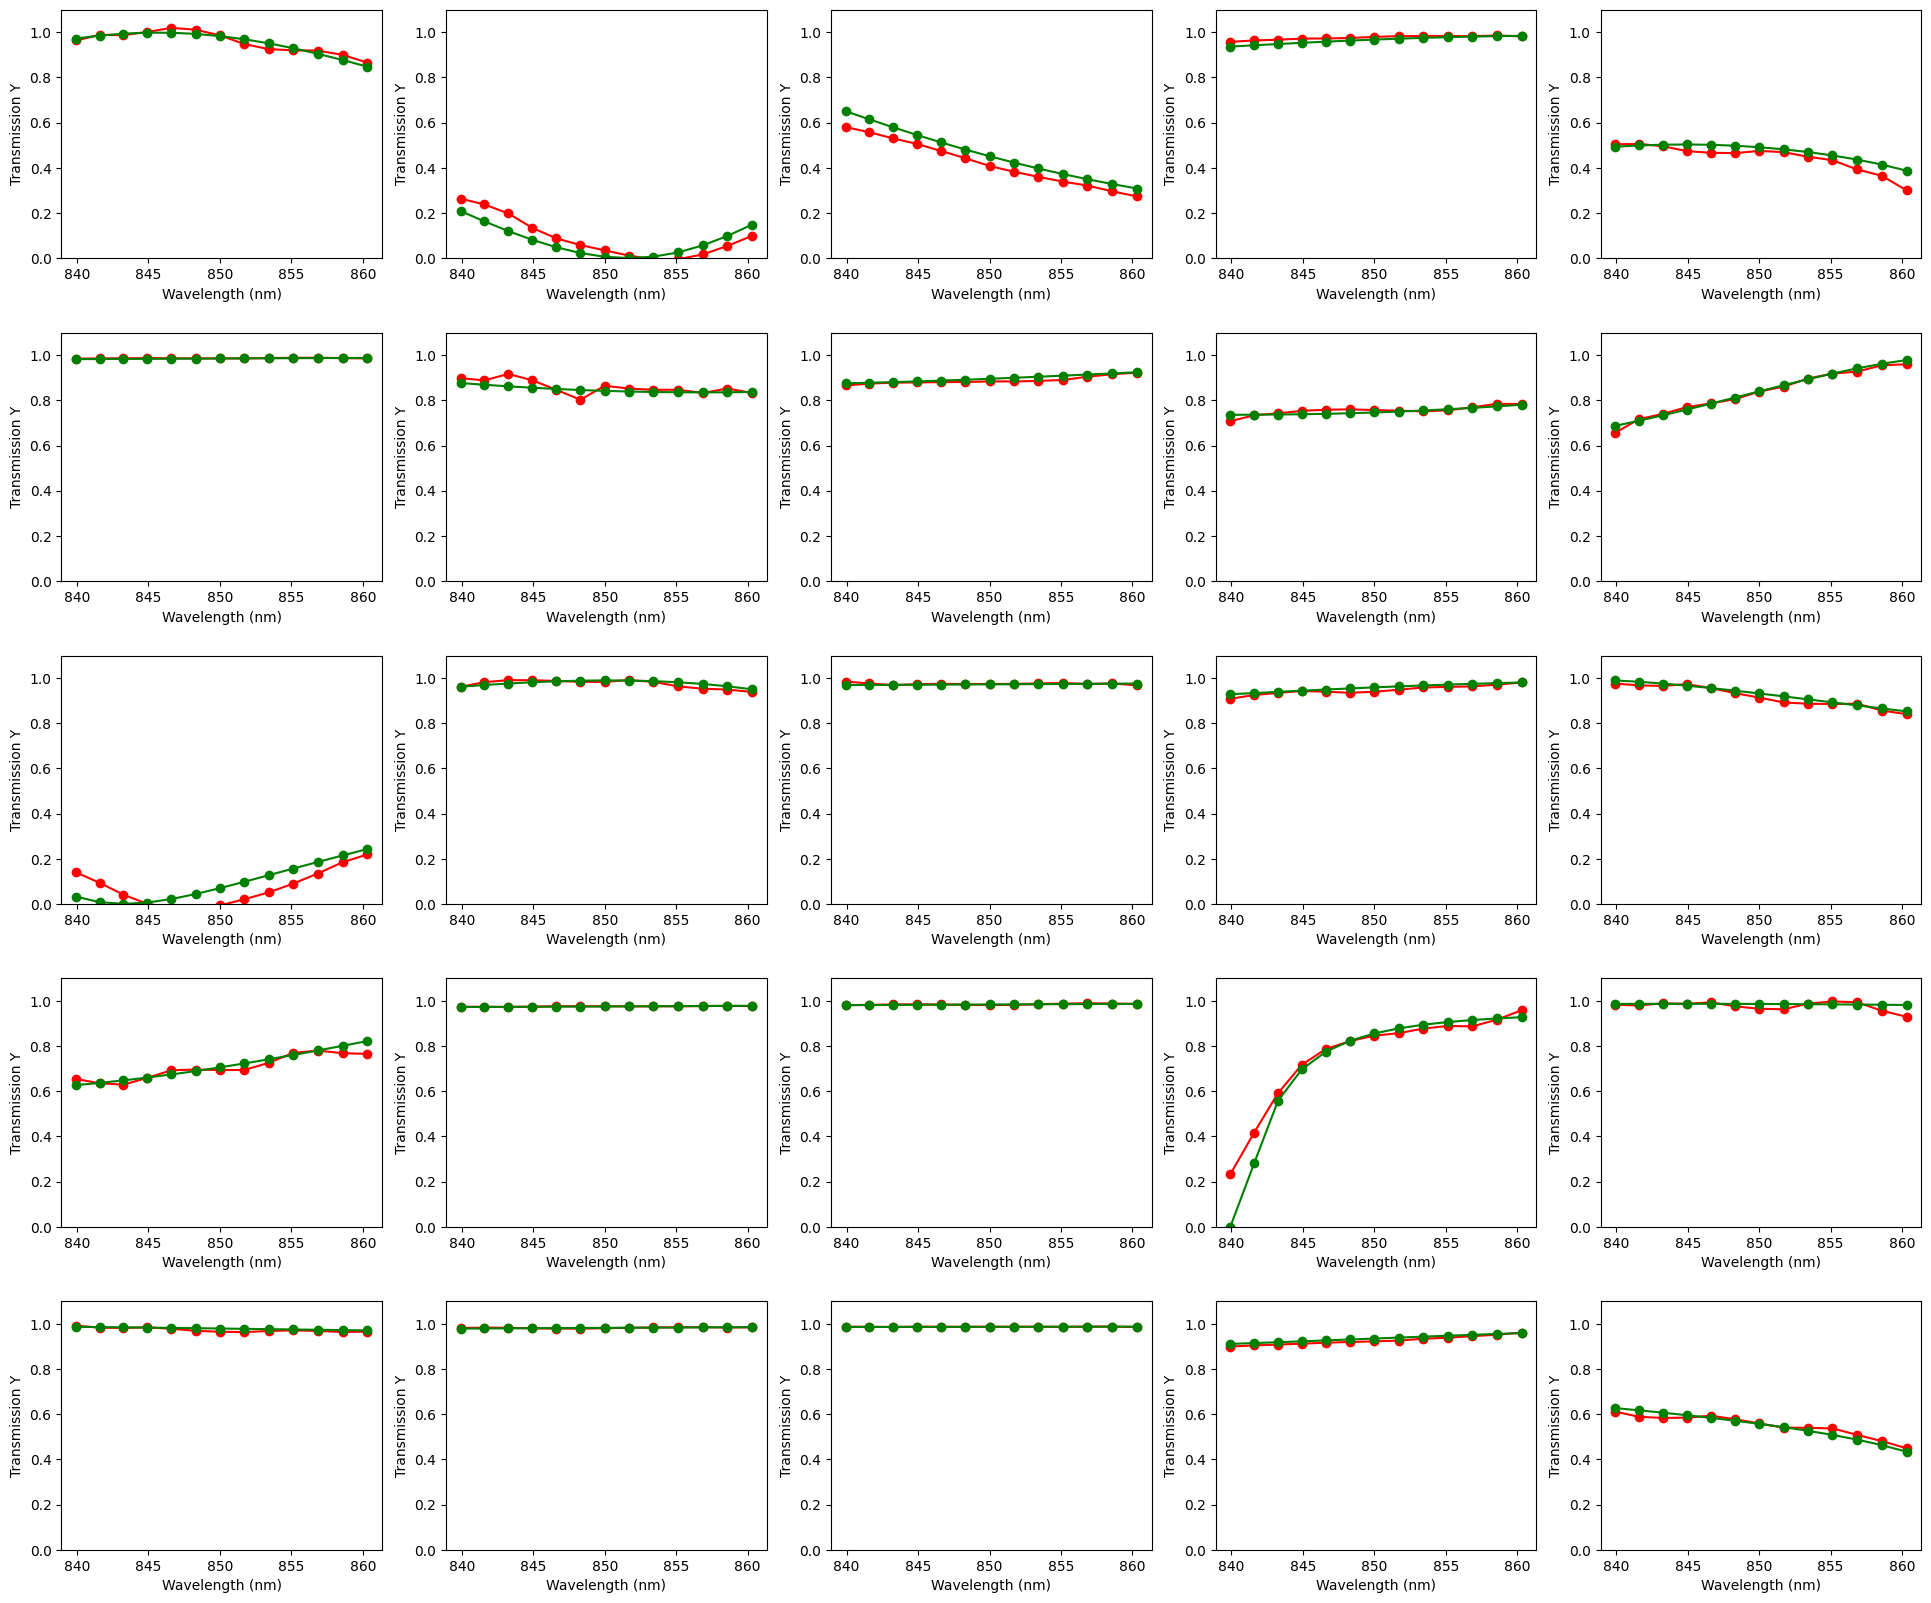

In [108]:
  plt.clf() #clears plot first
  plt.figure(figsize=(24, 20))
  plt.subplots_adjust(hspace=0.3)
  for n in range(1,26):
      plt.subplot(5,5,n)
      plot_spectrum_pred_small((n*100)-1, wavelist_20nm_range, flat_ideal_Ty, flat_pred_Ty, "Transmission Y")